<div style="line-height: 0.4;">
    <h1 style="color: green; font-weight: bold; text-align: center;"></h1>
    <h1 style="color: green; font-weight: bold; text-align: center;">APLICACION: REGRESION LINEAL</h1>
    <h3 style="color: darkolivegreen; font-weight: bold; text-align: center;">CURSO 3 (PROCESOS ESTOCÁSTICOS I)</h3>
    <h5 style="color: darkolivegreen; font-weight: bold; text-align: center;">PARTE 1 / LECCIÓN 3</h5>
</div>


El siguente slot ejecuta todas las bibliotecas necesarias para este scrip.

In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np

#Graficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#Procesado y modelado
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import statsmodels as sms
from tqdm import tqdm
import time

# configuración de matplotlib
plt.rcParams['image.cmap']="bwr"
plt.rcParams['figure.dpi']="100"
plt.rcParams['savefig.bbox']="tight"
style.use('ggplot') or plt.style.use('ggplot')

# configuración de warnings
import warnings
warnings.filterwarnings('ignore')


<h2 style="color: #7bbda1; text-align: center;"> <b> 1. Descripcion de la base de datos. </b> <br></h2>

**Jamboree** es una empresa educativa con sede en la India, especializada en la preparación y asesoramiento para estudiantes que buscan ingresar a universidades tanto en su país como en el extranjero. Ofrecen cursos intensivos de preparación para exámenes estandarizados como el *SAT, ACT, GRE, GMAT y TOEFL,* ayudando a mejorar los puntajes de los estudiantes. **Jamboree** se destaca por su enfoque personalizado y su amplia experiencia en la educación internacional.

A continuación se detalla el contexto y el significado de cada variable:

1. <span style="color:#7bbda1">**GRE Score**</span>: Puntaje obtenido en el examen GRE (Graduate Record Examination), utilizado para la admisión en programas de posgrado.
2. <span style="color:#7bbda1">**TOEFL Score**</span>: Puntaje obtenido en el examen TOEFL (Test of English as a Foreign Language), que evalúa la competencia en inglés.
3. <span style="color:#7bbda1">**University Rating**</span>: Calificación o clasificación de la universidad donde el estudiante ha solicitado admisión.
4. <span style="color:#7bbda1">**SOP**</span>: Statement of Purpose (Declaración de Propósito), un ensayo donde el estudiante explica sus motivaciones y metas académicas.
5. <span style="color:#7bbda1">**LOR**</span>: Letter of Recommendation (Carta de Recomendación), una carta escrita por un profesor o supervisor que evalúa las habilidades y aptitudes del estudiante.
6. <span style="color:#7bbda1">**CGPA**</span>: Cumulative Grade Point Average (Promedio de Calificaciones), el promedio acumulativo de las calificaciones obtenidas durante el grado anterior.
7. <span style="color:#7bbda1">**Research**</span>: Experiencia en investigación académica o científica del estudiante.
8. <span style="color:#7bbda1">**Chance of Admit**</span>: Probabilidad de admisión, una estimación de las posibilidades del estudiante de ser admitido en el programa deseado.

En este contexto específico:

- <span style="color:#7bbda1">**Chance of Admit**</span>: <span style="color:#7bbda1">**Salary**</span>. Probabilidad de admisión, una estimación de las posibilidades del estudiante de ser admitido en el programa deseado.
  
- <span style="color:#7bbda1">**Variables predictoras**</span>:  Usaremos las variables mencionadas anteriormente en la lista, enumeradas del **1 al 7**. 

    Al considerar todas estas variables como predictores, se obtiene una visión holística y completa del perfil académico, profesional y personal del estudiante, lo cual es crucial para hacer predicciones informadas sobre su probabilidad de admisión en un programa universitario específico.

**Jamboree** es reconocida por su compromiso en ayudar a los estudiantes a alcanzar sus metas académicas mediante una preparación rigurosa y personalizada para el proceso de admisión universitaria en instituciones de renombre a nivel mundial.

<a href= "https://www.kaggle.com/datasets/ranitsarkar01/jamboree-linear-regression-dataset"> Click para ver la Base de Datos de Jamboree</a>



Lectura de base de datos con la funcion <code> pd.read_csv() </code>

In [2]:
data = pd.read_csv("jamboree_dataset.csv")   #Lectura de la base de datos
data.head()                            #Muestra las primeras 5 filas del DF

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

Vemos que las columnas de **Serial No.** y de **Research** son categoricas,por tanto las desecharemos del analisis, usaremos <code> data.drop("" , axis = 1)</code>

In [4]:
data = data.drop(['Serial No.','Research'],axis=1) #Elimina las columnas mencionadas.
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
0,337,118,4,4.5,4.5,9.65,0.92
1,324,107,4,4.0,4.5,8.87,0.76
2,316,104,3,3.0,3.5,8.00,0.72
3,322,110,3,3.5,2.5,8.67,0.80
4,314,103,2,2.0,3.0,8.21,0.65


<h2 style="color: #7bbda1; text-align: center;"> <b> 2. Análisis Descriptivo. </b> <br></h2>

Usaremos <code>data.describe()</code> para generar un resumen estadístico de las columnas.

In [5]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,0.97000


#### Resumen de Estadísticas

**GRE Score:**
- **<span style="color:#7bbda1">Media</span>:316 puntos.**
- **<span style="color:#7bbda1">Desviación Estándar</span>: 11 puntos**
- **<span style="color:#7bbda1">Rango</span>: Desde 290 puntos hasta 340 puntos**

**TOEFL Score:**
- **<span style="color:#7bbda1">Media</span>:107.192 puntos.**
- **<span style="color:#7bbda1">Desviación Estándar</span>: 6.081868 puntos.**
- **<span style="color:#7bbda1">Rango</span>: Desde 92 puntos hasta 120 puntos.**

**University Rating	:**
- **<span style="color:#7bbda1">Media</span>:3.114.**
- **<span style="color:#7bbda1">Desviación Estándar</span>: 1.143512.**
- **<span style="color:#7bbda1">Rango</span>: Desde 1 hasta 5.**

**SOP:**
- **<span style="color:#7bbda1">Media</span>: 3.374 puntos.**
- **<span style="color:#7bbda1">Desviación Estándar</span>: 0.991004 puntos.**
- **<span style="color:#7bbda1">Rango</span>:  Desde 1 hasta 5.**

**LOR:**
- **<span style="color:#7bbda1">Media</span>: 3.484 puntos.**
- **<span style="color:#7bbda1">Desviación Estándar</span>: 0.92545 puntos.**
- **<span style="color:#7bbda1">Rango</span>:  Desde 1 hasta 5.**

**CGPA:**
- **<span style="color:#7bbda1">Media</span>: 8.57644 puntos.**
- **<span style="color:#7bbda1">Desviación Estándar</span>: 0.604813 puntos.**
- **<span style="color:#7bbda1">Rango</span>: Desde 6.8 puntos hasta 9.92 puntos.**

**Chance of Admit:**
- **<span style="color:#7bbda1">Media</span>: 0.72174%**
- **<span style="color:#7bbda1">Desviación Estándar</span>:  0.14114%**
- **<span style="color:#7bbda1">Rango</span>: Desde 0.34% hasta 0.97%**



Verificación de Datos Faltantes con <code> isna().sum()</code>

In [6]:
data.isna().sum() #Cuenta el numero de celdas vacias.

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Chance of Admit      0
dtype: int64

En efecto, no se econtraron datos faltantes.

Ahora, usaremos el método <code>.corr()</code>, calcula la correlación de *Pearson* entre las columnas numéricas de un DataFrame.

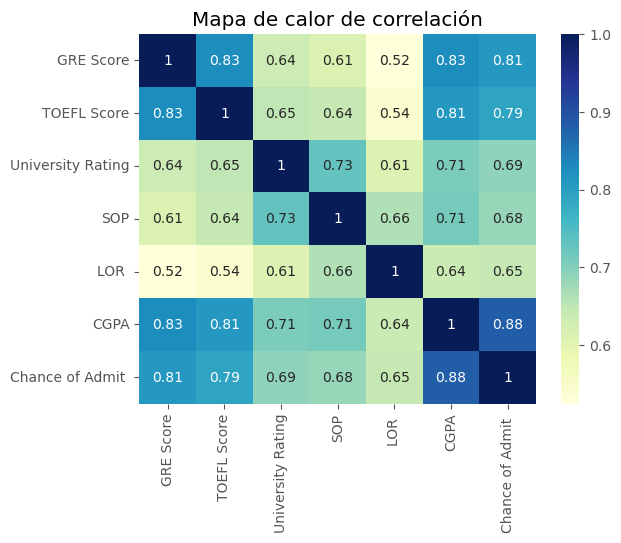

In [7]:
correlacion = data.corr() #Matriz de correlacion del DataFrame

#Creacion de mapa de calor de correlacion
sns.heatmap(correlacion, annot=True, cmap="YlGnBu")
plt.title('Mapa de calor de correlación')
plt.show()

<h2 style="color: #7bbda1; text-align: center;"> <b> 3. Graficos. </b> <br></h2>

Ahora usaremos <code>sns.pairplot() </code> para visualizar las relaciones entre múltiples variables numéricas de nuestro DataFrame.

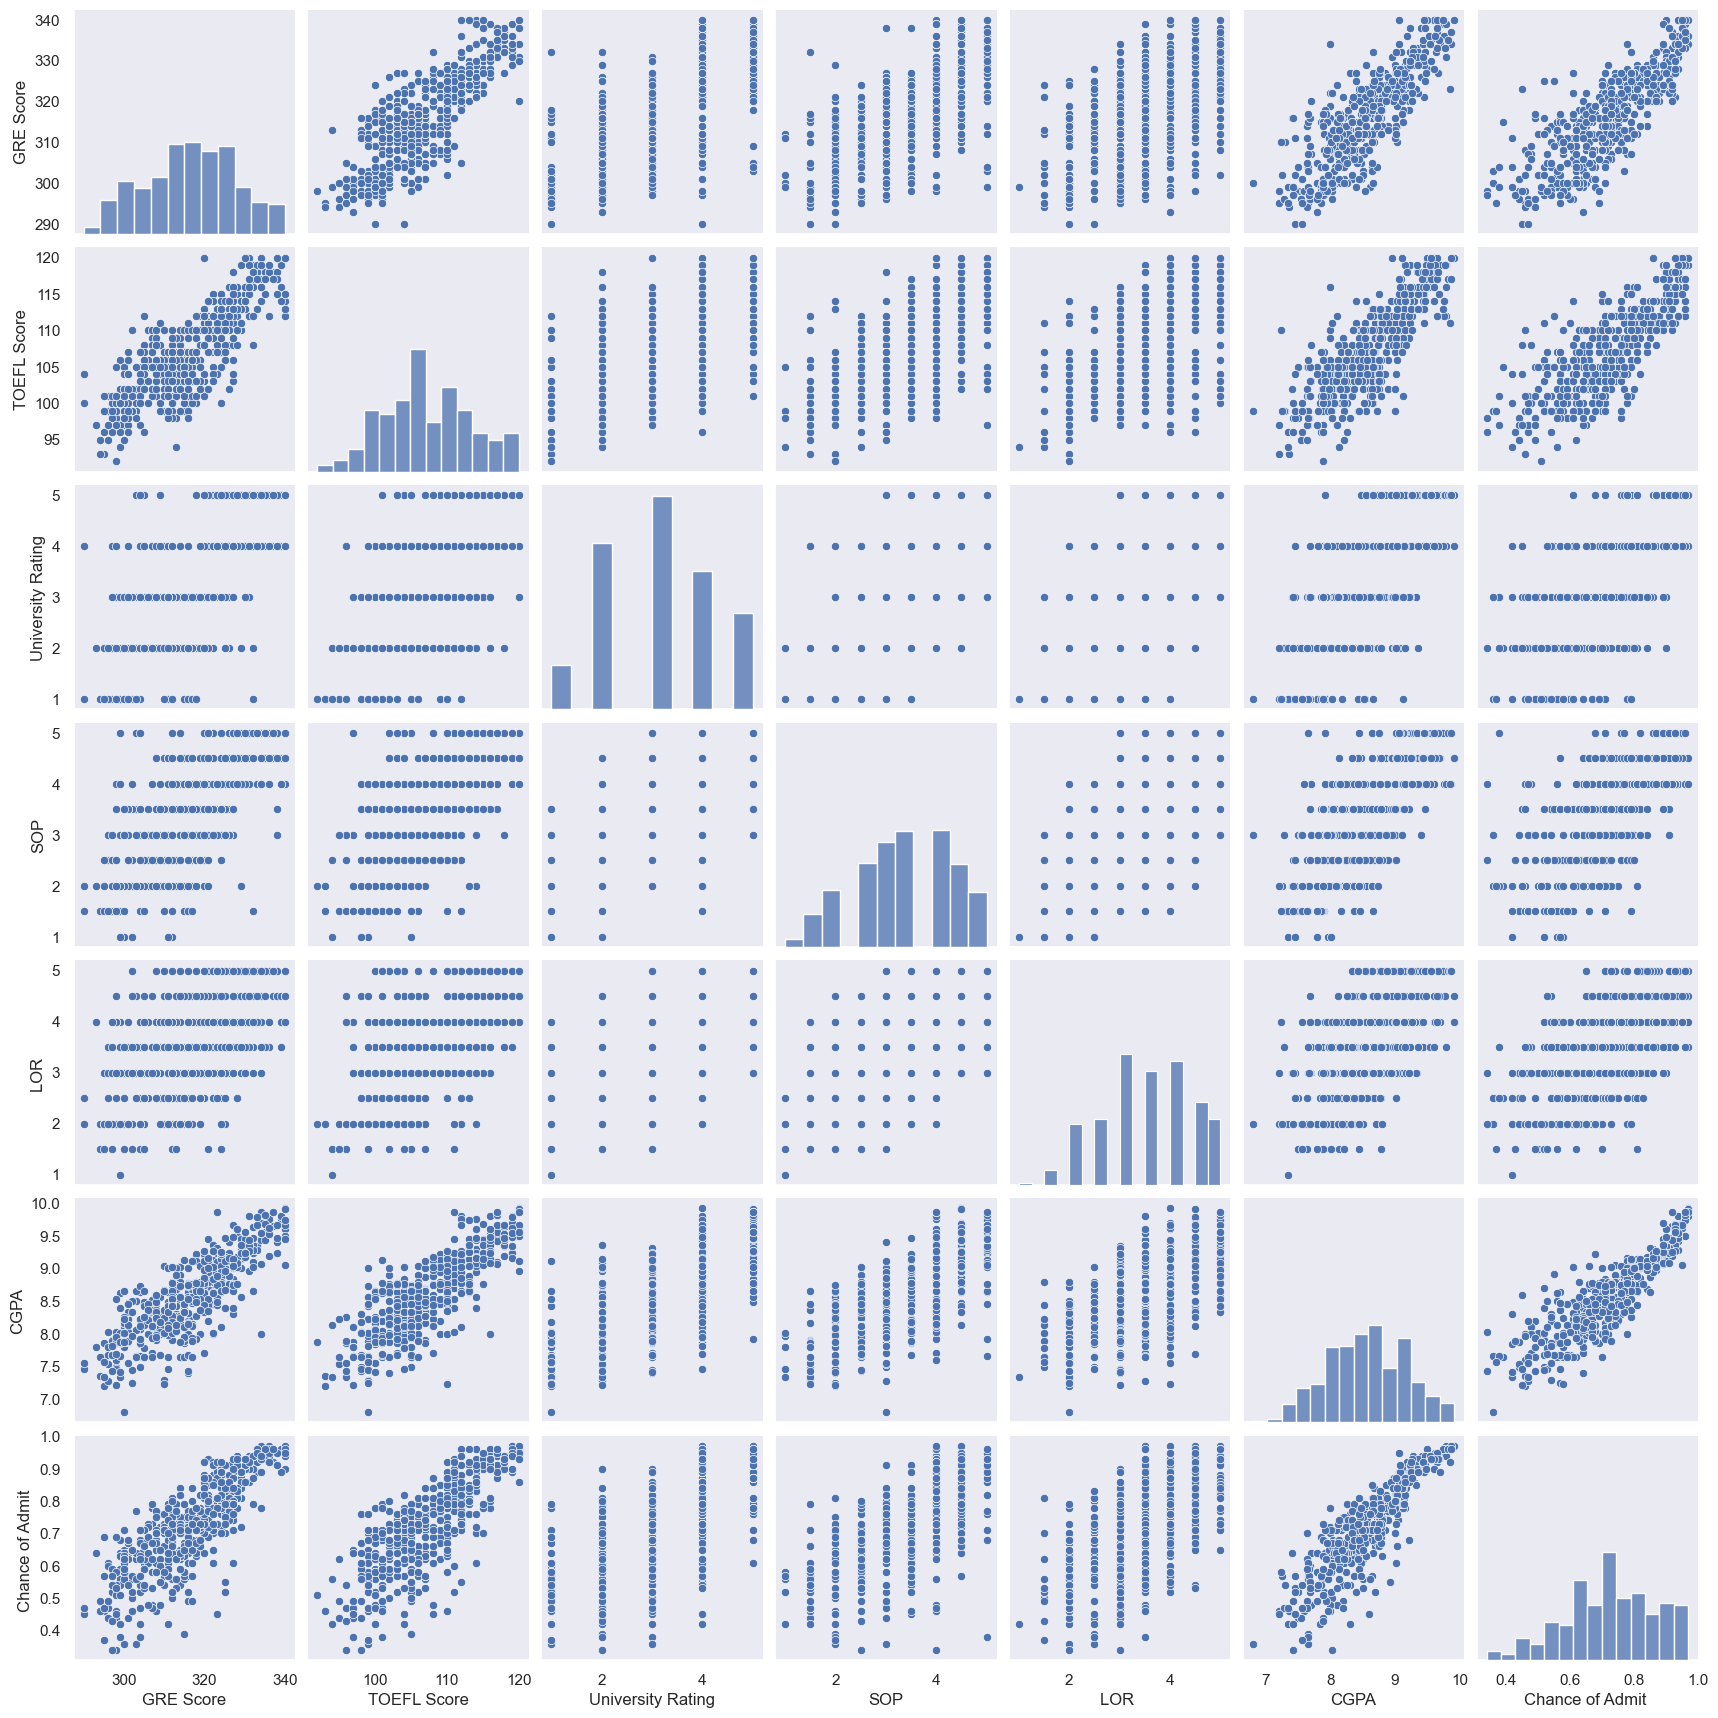

In [30]:
# Crear el pairplot para las variables prectora y de respuesta.
sns.pairplot(data)
sns.set(style="dark")
plt.show()

El gráfico **pairplot** permite observar las relaciones por pares entre las distintas variables. En la diagonal principal se muestran los histogramas de cada variable, donde se puede notar que aquellas de carácter numérico continuo (como los scores) presentan mejores comportamientos. Las variables categóricas, por otro lado, presentan un nivel de visualización más complejo.

En los **gráficos de dispersión**, se observa que las variables que exhiben una mayor relación y un comportamiento más adecuado para predecir la variable **"Chance of Admit"** son: TOEFL Score, GRE Score y CGPA. Las variables categóricas como LOR, SOP y University Ranking, aunque parecen no tener un buen comportamiento para predecir "Chance of Admit" a simple vista, muestran una correlación mayor a 0.6 en el diagrama de correlación. Por lo tanto, no podemos descartarlas de nuestro análisis.



Ahora, para verificar posibles *outliers*, usaremos la funcion de <code> sns.boxplot()</code>

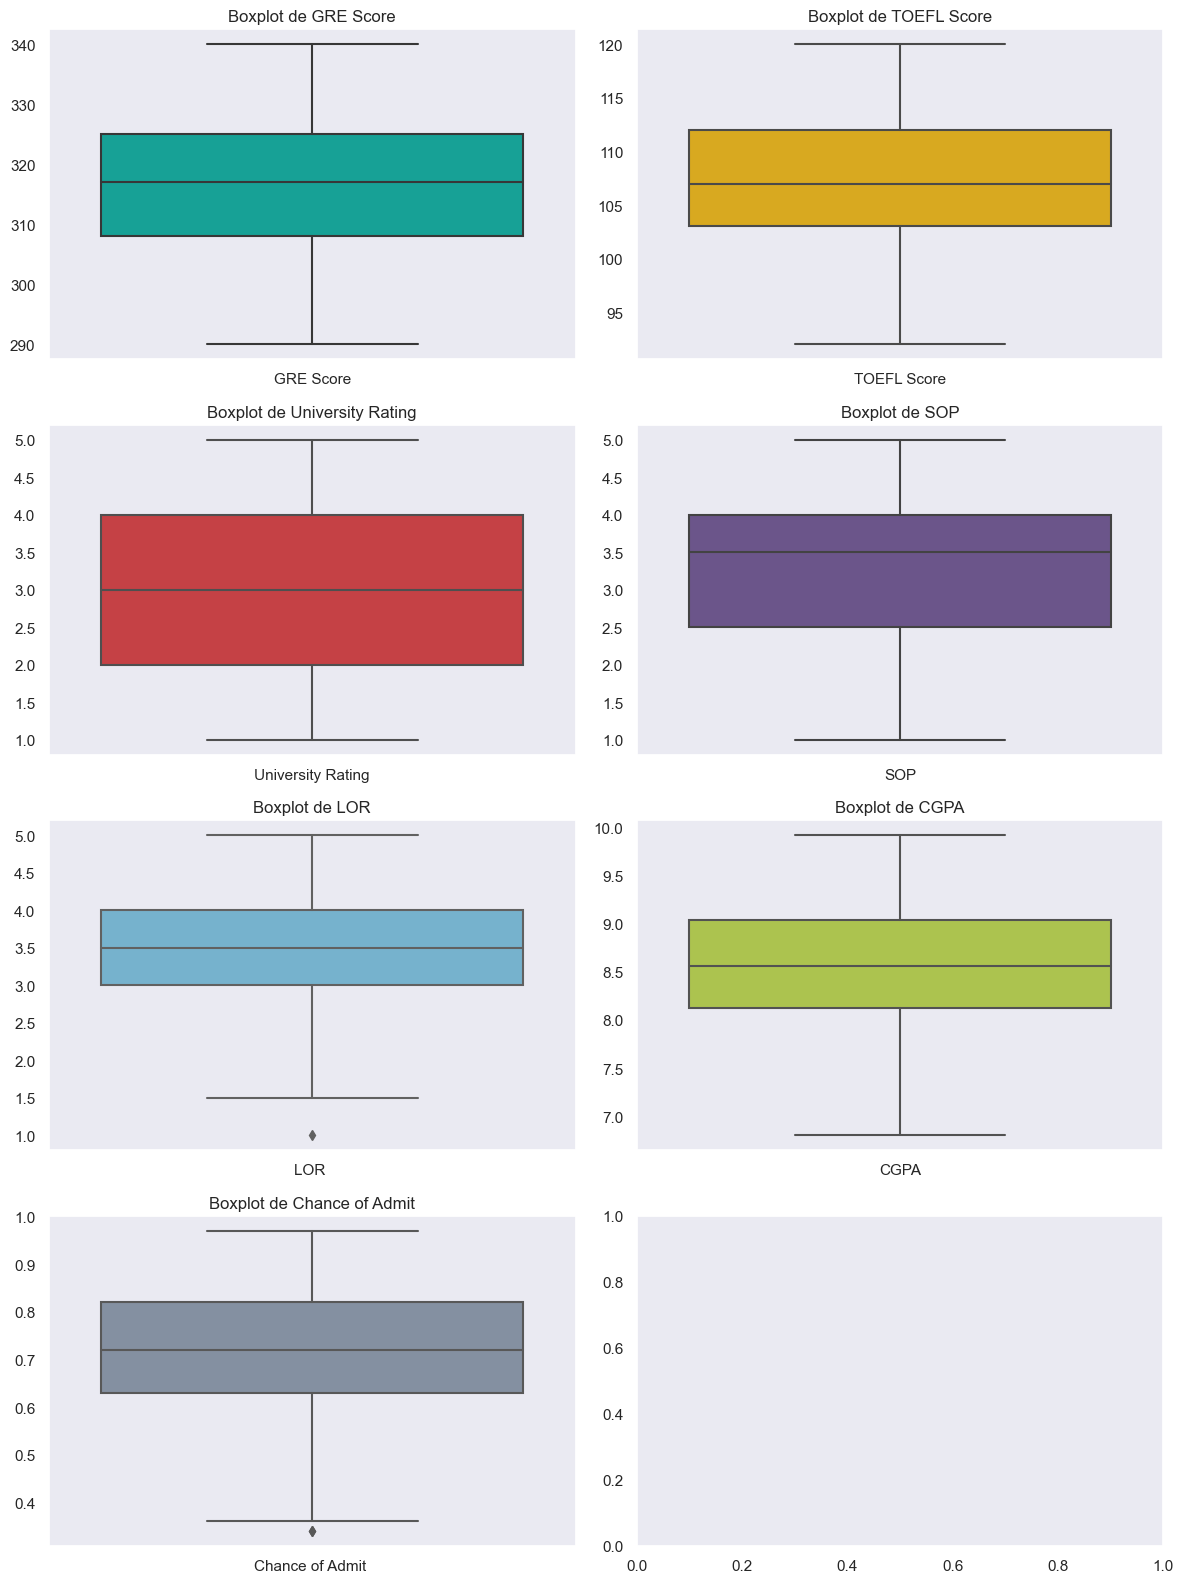

In [9]:
colors = ['#00b8a9', '#f7b801', '#db2b30', '#6a4c93', '#67b7dc', '#b7d63c', '#7f8fa6']
fig, axs = plt.subplots(4, 2, figsize=(12, 16))

# Plot 1: GRE Score
sns.boxplot(data[["GRE Score"]], color=colors[0], ax=axs[0, 0])
axs[0, 0].set_title('Boxplot de GRE Score')

# Plot 2: TOEFL Score
sns.boxplot(data[["TOEFL Score"]], color=colors[1], ax=axs[0, 1])
axs[0, 1].set_title('Boxplot de TOEFL Score')

# Plot 3: University Rating
sns.boxplot(data[["University Rating"]], color=colors[2], ax=axs[1, 0])
axs[1, 0].set_title('Boxplot de University Rating')

# Plot 4: SOP
sns.boxplot(data[["SOP"]], color=colors[3], ax=axs[1, 1])
axs[1, 1].set_title('Boxplot de SOP')

# Plot 5: LOR
sns.boxplot(data[["LOR "]], color=colors[4], ax=axs[2, 0])
axs[2, 0].set_title('Boxplot de LOR')

# Plot 6: CGPA
sns.boxplot(data[["CGPA"]], color=colors[5], ax=axs[2, 1])
axs[2, 1].set_title('Boxplot de CGPA')

# Plot 7: Chance of Admit
sns.boxplot(data[["Chance of Admit "]], color=colors[6], ax=axs[3, 0])
axs[3, 0].set_title('Boxplot de Chance of Admit')
fig.tight_layout()
plt.show()

Basandonos en los boxplots anteriores notamos que las variables con presencia de posibles outliers son LOR y Chance of admit.

La variables LOR muestra un puntaje bastante bajo en la carta de recomendación de un alumno mientras que Chance of admite asigna una probabilidad por debajo del 4% de acceder a la universidad desada.

Algunas posibles causas de un valor tan bajo en LOR pueden ser las siguientes:

* Desempeño Académico Excepcional o Deficiente: Un puntaje bajo en la carta de recomendación podría deberse a un desempeño académico muy deficiente del alumno, lo que puede llevar a que los recomendadores no proporcionen una calificación alta.

* Conflictos Personales:El alumno podría haber tenido conflictos personales con la persona que escribió la carta de recomendación, lo que puede influir negativamente en la evaluación.

* Errores de Evaluación:Puede haber un error o sesgo en la evaluación realizada por la persona que escribió la carta, como malentendidos o errores al interpretar el desempeño del alumno.

* Falta de Información Completa: El recomendador puede no tener información completa o precisa sobre el desempeño y las cualidades del alumno, lo que puede llevar a una evaluación baja

<h2 style="color: #7bbda1; text-align: center;"> <b> 4. Construcción del Modelo. </b> <br></h2>

Recuerde que en <code>X_orig</code> **UNICAMENTE** van almacenadas las variables **PREDICTORAS**

In [10]:
X_orig = data.drop("Chance of Admit ",axis=1)
X_orig.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,337,118,4,4.5,4.5,9.65
1,324,107,4,4.0,4.5,8.87
2,316,104,3,3.0,3.5,8.00
3,322,110,3,3.5,2.5,8.67
4,314,103,2,2.0,3.0,8.21


In [11]:
y_orig = data["Chance of Admit "]
y_orig.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [12]:
# Dividir los datos originales X_orig (características) y y_orig (etiquetas) en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_orig, y_orig, random_state=230624, train_size=0.80)

# Crear un nuevo DataFrame df combinando las características y etiquetas de entrenamiento
df = pd.concat([X_train, y_train], axis=1)

# Imprimir las dimensiones de los conjuntos de entrenamiento y prueba
print(X_train.shape) 
print(X_test.shape)   
print(y_train.shape) 
print(y_test.shape)   


(400, 6)
(100, 6)
(400,)
(100,)


In [13]:
# Añadir una columna constante (intercepto) a X_train
X_train = sm.add_constant(X_train, prepend=True)

# Crear un modelo de regresión lineal ordinaria (OLS) utilizando Statsmodels
modelo1 = sm.OLS(y_train, X_train)

# Ajustar el modelo utilizando los datos de entrenamiento
modelo1 = modelo1.fit()

# Imprimir un resumen detallado del modelo ajustado
print(modelo1.summary())


                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     294.3
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          5.66e-142
Time:                        19:35:50   Log-Likelihood:                 558.78
No. Observations:                 400   AIC:                            -1104.
Df Residuals:                     393   BIC:                            -1076.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.3898      0.10

<p style="color:red;"> <b>NOTA MPORTANTE:</b> </p> De aquí en adelante usaremos el scrip <code> complete_analisis.py </code> para automatizar la extracción de datos, pruebas de hipotesis y tests. Para su uso :

* En **GoogleColab**: copia el archivo <code> complete_analisis.ipynb </code>en la misma carpeta de  <code> Jamboree.ipynb </code>
* En un **IDLE local**: copia el archivo <code> complete_analisis.py </code>en la misma carpeta de  <code> Jamboree.ipynb </code>

Después con <code> from complete_analisis import *</code> podras acceder a todas nuestras funciones:

1. <code> coeficientes(modelo)</code>
2. <code> prueba_global(modelo)</code>
3. <code> corr_det(modelo) </code>
4. <code> prueba_ind(modelo)</code>
5. <code> inter_conf(modelo)</code>
6. <code> anali_redi(modelo)</code>
7. <code> d_w(modelo)</code>
8. <code> jb(modelo)</code>
9. <code> graficos_resid(modelo)</code>
10. <code> full_analisis(modelo)</code>

<a href= "https://drive.google.com/drive/folders/19HdZcCnUf7DSSILRwFD81WP0DCepevko?usp=sharing"> DESCARGAR complete_analisis</a>

Procedemos a la extracción de los estimadores de $\beta_{i}, \ i=0,\cdots,6$ Usaremos el atributo <code> modelo.params[i] </code> para lograrlo. 

In [14]:
from complete_analisis import *

In [15]:
coeficientes(modelo1)

Beta_0: -1.38976
Beta_1: 0.00214
Beta_2: 0.00285
Beta_3: 0.01060
Beta_4: -0.00044
Beta_5: 0.01817
Beta_6: 0.12069


Ahora, podemos construir el modelo de Regresión Lineal Multiple, vea que:
$$ \hat{y} = -\underbrace{1.38976}_{\beta_{0}} + \underbrace{0.00214}_{\beta_{1}}x_{1}+ \underbrace{0.00285}_{\beta_{2}}x_{2}+ \underbrace{0.01060}_{\beta_{3}}x_{3}- \underbrace{0.00044}_{\beta_{4}}x_{4}+ \underbrace{0.01817}_{\beta_{5}}x_{5}+ \underbrace{0.12069}_{\beta_{6}}x_{6}  $$

<h2 style="color: #7bbda1; text-align: center;"> <b> 5. Prueba Global </b> <br></h2>

Ahora, vamos a evaluar si al menos uno de los predictores <b>(variables independientes)</b> tiene un efecto significativo sobre la variable de respuesta <b>(variable dependiente).</b>

\begin{align*}
H_{0}:&  \ \small \text{No hay efecto significativo de las variables predictoras en la variable de respuesta.} \\
H_{1}:&  \ \small \text{Al menos una de las variables predictoras tiene un efecto significativo en la variable de respuesta.}
\end{align*}
Ahora en simbolos:
\begin{align*}
H_{0}:& \ \beta_{1}=\beta_{2}=, \cdots ,=\beta_{6}=0 \\
H_{1}:& \ \beta_{1}\neq \beta_{2}\neq , \cdots ,\neq \beta_{6} \neq 0
\end{align*}

In [16]:
prueba_global(modelo1)

Estadística F : 294.26472705879445
P_value_f: 0.0000000000


Progreso: 100%|██████████| 100/100 [00:01<00:00, 96.89it/s]

H_0 ES rechazado. 
Al menos una de las variables predictoras tiene un efecto significativo en la variable de respuesta.


En efecto, vea que al menos una de las variables predictoras tiene un efecto significativo en la variable de respuesta.
$$ \text{P-value} = 0.000 < 0.05 = \alpha \ \text{(True)} $$ 
Por lo tanto, $H_{0}$ es rechazado y podemos inferir que:
$$ \beta_{1}\neq \beta_{2}\neq , \cdots ,\neq \beta_{6} \neq 0$$
Con un nivel $\alpha = 0.05$ de significancia.

<h2 style="color: #7bbda1; text-align: center;"> <b> 6. Pruebas Individuales  </b> <br></h2>

\begin{align*}
H_{0}:&  \ \small \text{No hay efecto significativo de la variable $\beta_{i}$ en la variable de respuesta.} \\
H_{1}:&  \ \small \text{La variables predictora $\beta_{i}$ tiene un efecto significativo en la variable de respuesta.}
\end{align*}
Ahora en simbolos:
\begin{align*}
H_{0}:& \ \beta_{i}=0 \\
H_{1}:& \ \beta_{i} \neq 0
\end{align*}

In [17]:
prueba_ind(modelo1)

Progreso: 100%|██████████| 100/100 [00:01<00:00, 96.69it/s]

PRUEBA PARA BETA_0
  Estadistica t para Beta_0: -12.86207 
  P-value para Beta_0: 0.00000 
  H_0 ES rechazado. 
 Beta_0 tiene un efecto significativo en la variable de respuesta.
_____________________________________________________________________________________________
PRUEBA PARA BETA_1
  Estadistica t para Beta_1: 4.01574 
  P-value para Beta_1: 0.00007 
  H_0 ES rechazado. 
 Beta_1 tiene un efecto significativo en la variable de respuesta.
_____________________________________________________________________________________________
PRUEBA PARA BETA_2
  Estadistica t para Beta_2: 3.02080 
  P-value para Beta_2: 0.00269 
  H_0 ES rechazado. 
 Beta_2 tiene un efecto significativo en la variable de respuesta.
_____________________________________________________________________________________________
PRUEBA PARA BETA_3
  Estadistica t para Beta_3: 2.44204 
  P-value para Beta_3: 0.01504 
  H_0 ES rechazado. 
 Beta_3 tiene un efecto significativo en la variable de respuesta.
________

En resumen, tenemos de las pruebas individuales:
\begin{align*}
    \beta_{0} &\rightarrow \ \text{Contribuye al modelo} \\
    \beta_{1} &\rightarrow \ \text{Contribuye al modelo} \\
    \beta_{2} &\rightarrow \ \text{Contribuye al modelo} \\
    \beta_{3} &\rightarrow \ \text{Contribuye al modelo} \\
    \beta_{4} &\rightarrow \ \text{NO contribuye al modelo}  \\
    \beta_{5} &\rightarrow \ \text{Contribuye al modelo} \\
    \beta_{6} &\rightarrow \ \text{Contribuye al modelo}
\end{align*}

<h2 style="color: #7bbda1; text-align: center;"> <b> 7. Mejora del Modelo  </b> <br></h2>

####  (Retiramos $\beta_{4}$)

In [18]:
X_upg = data.drop(["SOP","Chance of Admit "],axis=1)
X_upg.head()

,GRE Score,TOEFL Score,University Rating,LOR,CGPA
0,337,118,4,4.5,9.65
1,324,107,4,4.5,8.87
2,316,104,3,3.5,8.00
3,322,110,3,2.5,8.67
4,314,103,2,3.0,8.21


In [19]:
y_upg = data["Chance of Admit "]
y_upg.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [20]:
# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_upg, y_upg, random_state=230624, train_size=0.80)

# Creación de un nuevo DataFrame combinando características de entrenamiento y etiquetas de entrenamiento
df = pd.concat([X_train, y_train], axis=1)

# Impresión de las dimensiones de los conjuntos de entrenamiento y prueba
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 5)
(100, 5)
(400,)
(100,)


In [21]:
# Añadir una columna constante (intercepto) a X_train
X_train = sm.add_constant(X_train, prepend=True)

# Crear un modelo de regresión lineal ordinaria (OLS) usando Statsmodels
modelo2 = sm.OLS(y_train, X_train)

# Ajustar el modelo utilizando los datos de entrenamiento
modelo2 = modelo2.fit()

# Imprimir un resumen del modelo ajustado
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     354.0
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          2.87e-143
Time:                        19:35:52   Log-Likelihood:                 558.78
No. Observations:                 400   AIC:                            -1106.
Df Residuals:                     394   BIC:                            -1082.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.3889      0.10

<h2 style="color: #7bbda1; text-align: center;"> <b> 8. Ecuacion de la Mejora del Modelo  </b> <br></h2>

In [22]:
coeficientes(modelo2)

Beta_0: -1.38889
Beta_1: 0.00214
Beta_2: 0.00285
Beta_3: 0.01045
Beta_4: 0.01805
Beta_5: 0.12050


Ahora, podemos construir el modelo de Regresión Lineal Multiple, vea que:  
$$ \hat{y} = -\underbrace{1.38889}_{\beta_{0}} + \underbrace{0.00214}_{\beta_{1}}x_{1}+ \underbrace{0.00285}_{\beta_{2}}x_{2}+ \underbrace{0.01045}_{\beta_{3}}x_{3}+\underbrace{0.01805}_{\beta_{4}}x_{4}+ \underbrace{0.12050}_{\beta_{5}}x_{5} $$

<h2 style="color: #7bbda1; text-align: center;"> <b> 9-10 Intervalos de Confianza  </b> <br></h2>

In [23]:
inter_conf(modelo2)

Intervalo de confianza para beta_0:[-1.6, -1.1778]
Intervalo de confianza para beta_1:[0.0011, 0.0032]
Intervalo de confianza para beta_2:[0.001, 0.0047]
Intervalo de confianza para beta_3:[0.0027, 0.0182]
Intervalo de confianza para beta_4:[0.0094, 0.0267]
Intervalo de confianza para beta_5:[0.0995, 0.1414]


Vea que:
\begin{align*}
\hat{\beta_{0}} &\in  [-1.6, -1.1778] \\ 
\hat{\beta_{1}} &\in  [0.0011, 0.0032] \\ 
\hat{\beta_{2}} &\in  [0.001, 0.0047] \\ 
\hat{\beta_{3}} &\in  [0.0027, 0.0182] \\ 
\hat{\beta_{4}} &\in  [0.0094, 0.0267] \\ 
\hat{\beta_{5}} &\in  [0.0995, 0.1414] 
\end{align*}
Con un 95% de confianza

<h2 style="color: #7bbda1; text-align: center;"> <b> 11. Coeficiente de Determinacion  </b> <br></h2>

In [24]:
corr_det(modelo2)

Coeficiente de Correlacion: 0.9031
Coeficiente de Determinacion Adj: 81.5623%


El coeficiente de correlación $r$ mide la fuerza y la dirección de la relación lineal entre la variable predictora y de respuesta. En este caso, un valor de 0.9031 indica que hay una **relación lineal positiva muy fuerte** entre las variables.

Nuestro coeficiente de determinación del $R^2= $ **81.5623%** indica que el modelo de regresión **explica en buena parte la variabilidad de la variable dependiente observada**, lo cual es indicativo de un modelo predictivo efectivo.

<h2 style="color: #7bbda1; text-align: center;"> <b> 12. Analisis de Residuales  </b> <br></h2>

In [25]:
anali_redi(modelo2)

Media de los residuales: -0.0000000000
Desviacion estandar de los residuales: 0.05993


En efecto:
$$  \mathbb{E}[e_{i}]=0$$
Vea tambien que:
$$ \mathbb{V}ar[e_{i}]= (0.05993)^2$$

El estadístico <span style="color:#7bbda1">**Durbin-Watson (DW)**</span> es una medida utilizada en análisis de regresión para detectar la presencia de autocorrelación de primer orden en los residuos del modelo. La autocorrelación se refiere a la correlación entre los errores (o residuos) del modelo en momentos consecutivos en el tiempo o en observaciones secuenciales en datos transversales.

1. <span style="color:#7bbda1">**Interpretación**</span>: 
   - Un valor de DW cercano a 2 es deseable porque indica que los residuos no están correlacionados.
   - Valores significativamente menores que 2 sugieren autocorrelación positiva.
   - Valores significativamente mayores que 2 sugieren autocorrelación negativa.


In [26]:
d_w(modelo2)

Estadistico Durbin-Watson : 1.963946316793783


En efecto, El resultado del estadístico <span style="color:#7bbda1">**Durbin-Watson de 1.9639**</span> sugiere que los residuos del modelo de regresión no presentan una autocorrelación significativa.

<!-- . -->

El <span style="color:#7bbda1">**test de Jarque-Bera**</span> verifica si una muestra de datos se distribuye de manera normal o no. La hipótesis nula asume que los datos siguen una distribución normal, mientras que la alternativa sugiere lo contrario.

\begin{align*}
H_{0}:&  \ \small \text{Los datos siguen una distribución normal.} \\
H_{1}:&  \ \small \text{ Los datos no siguen una distribución normal.}
\end{align*}
Ahora en simbolos:
\begin{align*}
H_{0}:& \ e_{i} \sim \eta(\mu , \sigma^2) \\
H_{1}:& \ e_{i} \not\sim \eta(\mu , \sigma^2)
\end{align*}

In [27]:
jb(modelo2)

Estadistico de Jarque-Bera: 213.56602
P-Value de Jarque-Bera: 0.0


Progreso: 100%|██████████| 100/100 [00:01<00:00, 96.69it/s]

H_0 ES rechazado. 
Los residuos no siguen una distribución normal.


En efecto, vea que los errores son normalmente distribuidos.
$$ \text{P-value} = 0.0 < 0.05 = \alpha \ \text{(True)} $$ 
Por lo tanto, $H_{0}$ se rechaza y podemos inferir que:
$$ e_{i} \not\sim \eta(\mu , \sigma^2)

<h2 style="color: #7bbda1; text-align: center;"> <b> 13. Graficos de Residuales  </b> <br></h2>

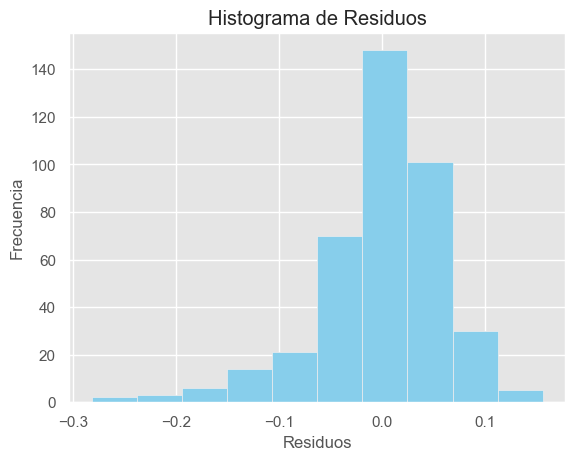

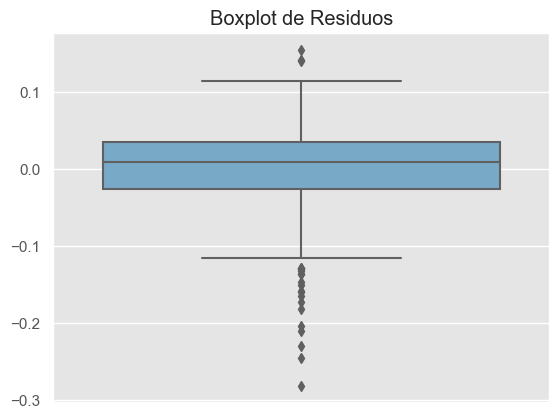

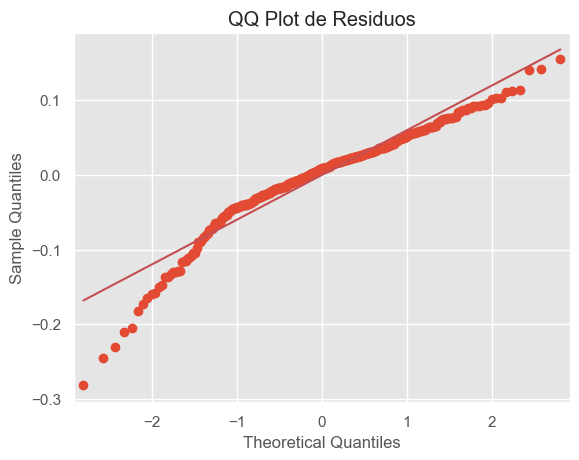

In [28]:
graficos_resid(modelo2)

En el histograma de residuos, se observa claramente que la distribución no sigue la forma de una distribución normal, ya que la cola izquierda está más cargada que la derecha, lo cual indica una falta de simetría deseada.

Al analizar el Q-Q plot y el boxplot, se puede confirmar la observación hecha en el histograma. En el boxplot, se presentan numerosos valores por debajo del primer cuartil, y en el Q-Q plot, los valores a la izquierda están por debajo de la línea recta esperada para una distribución normal de residuos.

Estos hallazgos sugieren que los residuos no siguen una distribución normal, lo que podría afectar la validez de los resultados del análisis de regresión múltiple. Es recomendable considerar transformaciones de datos o el uso de técnicas robustas para mejorar el ajuste del modelo y cumplir con los supuestos de normalidad de los residuos.